In [2]:
import requests
import json
from pathlib import Path
import re 

# URL API
url = "https://dane.szczecin.eu/drzewa/drzewa.json"

data_dir = Path("data")
data_dir.mkdir(exist_ok=True)
file_path = data_dir / "drzewa.json"
response = requests.get(url)
response.raise_for_status() 
with open(file_path, "w", encoding="utf-8") as f:
    json.dump(response.json(), f, ensure_ascii=False, indent=2)




In [4]:
import pandas as pd
import json

with open("data/drzewa.json", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data["results"])
df.head()


,kategoriaDanych,nazwaPl,rodzajLac,gatunekLac,odmianaLac,wysokoscDrzewa,srednicaPnia,srednicaKorony,dataModyfikacji,x,y,lon,lat
0,parkowe,Cis pospolity,baccata,Taxus,-,3.500000000000000,12;7;9;6;9,7.000000000000000,2022-09-20,5.470800e+06,5.922447e+06,14.560629,53.433033
1,parkowe,Klon zwyczajny,platanoides,Acer,-,22.500000000000000,52,18.000000000000000,2022-12-02,5.471000e+06,5.922475e+06,14.563633,53.433303
2,parkowe,Klon zwyczajny,platanoides,Acer,-,29.000000000000000,81,17.500000000000000,2022-11-20,5.470787e+06,5.922285e+06,14.560442,53.431579
3,parkowe,Grab pospolity,betulus,Carpinus,-,22.500000000000000,35,11.000000000000000,2022-11-20,5.470786e+06,5.922284e+06,14.560424,53.431572
4,parkowe,Grab pospolity,betulus,Carpinus,-,17.000000000000000,34,12.000000000000000,2022-08-25,5.470782e+06,5.922266e+06,14.560374,53.431411


In [ ]:

import numpy as np


print(df.isna().sum().sort_values(ascending=False))


print(df["kategoriaDanych"].value_counts())
print(df["nazwaPl"].value_counts().head(10))

def clean_trunks(value):
    """

    """
    if pd.isna(value) or value == '-':
        return 0, 0  
    
    trunks = re.findall(r'\d+', str(value))
    
    if not trunks:
        return 0, 0
    
   
    trunk_diameters = [int(t) for t in trunks]
    
    num_trunks = len(trunk_diameters)
    total_diameter = sum(trunk_diameters)
    
    return num_trunks, total_diameter

df[['Liczba pni', 'Sumaryczna średnica pnia']] = df['srednicaPnia'].apply(
    lambda x: pd.Series(clean_trunks(x))
)


df['wysokoscDrzewa'] = df['wysokoscDrzewa'].replace('-', np.nan)
df['srednicaKorony'] = df['srednicaKorony'].replace('-', np.nan)

df['wysokoscDrzewa'] = pd.to_numeric(df['wysokoscDrzewa'])
df['srednicaKorony'] = pd.to_numeric(df['srednicaKorony'])



print("\n---data after cleaning ---")
display(df[['srednicaPnia', 'Liczba pni', 'Sumaryczna średnica pnia']].head(10))
print("\n")
display(df.head(10))

df.to_csv('cleandata.csv', index=False, encoding='utf-8')



srednicaKorony              545
wysokoscDrzewa                2
kategoriaDanych               0
nazwaPl                       0
rodzajLac                     0
gatunekLac                    0
odmianaLac                    0
srednicaPnia                  0
dataModyfikacji               0
x                             0
y                             0
lon                           0
lat                           0
Liczba pni                    0
Sumaryczna średnica pnia      0
dtype: int64
kategoriaDanych
korony        33776
pozostale      4658
przydrozne     3676
parkowe        3431
Name: count, dtype: int64
nazwaPl
-                      33776
Lipa drobnolistna       1602
Klon zwyczajny          1150
Robinia akacjowa         926
Klon jawor               766
Lipa szerokolistna       443
Dąb szypułkowy           429
Brzoza brodawkowata      372
Jesion wyniosły          346
Platan klonolistny       329
Name: count, dtype: int64

---data after cleaning ---


,srednicaPnia,Liczba pni,Sumaryczna średnica pnia
0,12;7;9;6;9,5,43
1,52,1,52
2,81,1,81
3,35,1,35
4,34,1,34
5,49,1,49
6,51,1,51
7,54,1,54
8,46,1,46
9,44,1,44


,kategoriaDanych,nazwaPl,rodzajLac,gatunekLac,odmianaLac,wysokoscDrzewa,srednicaPnia,srednicaKorony,dataModyfikacji,x,y,lon,lat,Liczba pni,Sumaryczna średnica pnia
0,parkowe,Cis pospolity,baccata,Taxus,-,3.5,12;7;9;6;9,7.0,2022-09-20,5.470800e+06,5.922447e+06,14.560629,53.433033,5,43
1,parkowe,Klon zwyczajny,platanoides,Acer,-,22.5,52,18.0,2022-12-02,5.471000e+06,5.922475e+06,14.563633,53.433303,1,52
2,parkowe,Klon zwyczajny,platanoides,Acer,-,29.0,81,17.5,2022-11-20,5.470787e+06,5.922285e+06,14.560442,53.431579,1,81
3,parkowe,Grab pospolity,betulus,Carpinus,-,22.5,35,11.0,2022-11-20,5.470786e+06,5.922284e+06,14.560424,53.431572,1,35
4,parkowe,Grab pospolity,betulus,Carpinus,-,17.0,34,12.0,2022-08-25,5.470782e+06,5.922266e+06,14.560374,53.431411,1,34
5,parkowe,Grab pospolity,betulus,Carpinus,-,23.5,49,17.0,2022-11-17,5.470778e+06,5.922263e+06,14.560315,53.431383,1,49
6,parkowe,Grab pospolity,betulus,Carpinus,-,21.5,51,15.0,2022-08-25,5.470788e+06,5.922263e+06,14.560465,53.431383,1,51
7,parkowe,Brzoza brodawkowata,pendula,Betula,-,20.5,54,16.0,2022-11-29,5.470744e+06,5.922427e+06,14.559781,53.432851,1,54
8,parkowe,Jesion wyniosły,excelsior,Fraxinus,-,27.5,46,15.0,2022-09-03,5.470728e+06,5.922423e+06,14.559552,53.432814,1,46
9,parkowe,Lipa drobnolistna,cordata,Tilia,-,21.5,44,14.5,2022-09-04,5.470840e+06,5.922386e+06,14.561237,53.432495,1,44



Данные успешно сохранены в файл 'cleandata.csv'


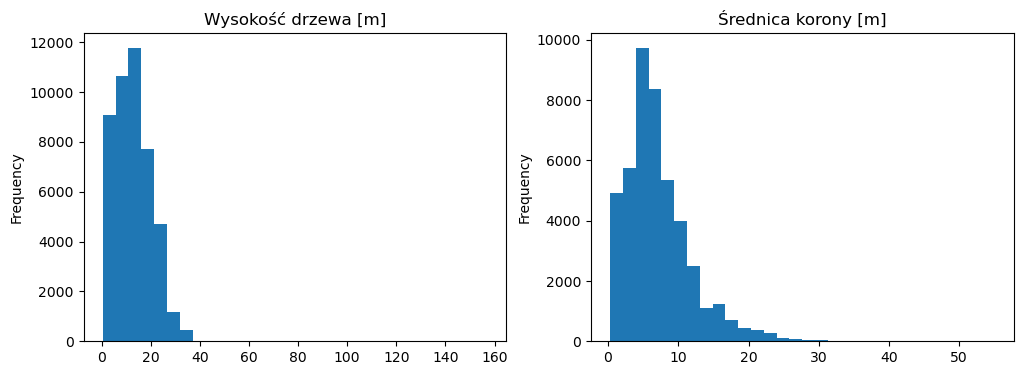

In [29]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df['wysokoscDrzewa'].plot(kind='hist', bins=30, ax=ax[0], title='Wysokość drzewa [m]')
df['srednicaKorony'].plot(kind='hist', bins=30, ax=ax[1], title='Średnica korony [m]')
plt.show()


In [32]:
outliers = df[df['wysokoscDrzewa'] > 60]
print(f"Liczba anomalii: {len(outliers)}")
display(outliers[['nazwaPl', 'wysokoscDrzewa']].head())


Liczba anomalii: 12


,nazwaPl,wysokoscDrzewa
31480,-,140.0
31481,-,140.0
31483,-,140.0
31484,-,140.0
31485,-,140.0


In [ ]:
import folium

m = folium.Map(location=[53.43, 14.55], zoom_start=12)
for _, row in df.sample(500).iterrows(): 
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=2,
        color="green",
        fill=True,
        fill_opacity=0.6,
    ).add_to(m)

m.save("mapa_drzewa.html")



✅ Mapa zapisana jako mapa_drzewa.html


In [11]:
pivot_counts = (
    df.pivot_table(
        index="nazwaPl",
        columns="kategoriaDanych",
        values="wysokoscDrzewa",
        aggfunc="count"
    )
    .fillna(0)
    .astype(int)
)

pivot_counts.head(10)


kategoriaDanych,korony,parkowe,pozostale,przydrozne
nazwaPl,,,,
-,33776,0,0,0
Ambrowiec amerykański,0,1,1,0
Berberys pospolity,0,1,0,0
Bez czarny,0,53,87,9
Biota wschodnia,0,6,5,0
Bożodrzew gruczołkowaty,0,11,2,1
Brzoza brodawkowata,0,63,183,126
Brzoza brodawkowata 'Youngii',0,2,1,0
Brzoza papierowa,0,6,11,1
